**HAZIRLAYANLAR: 120101047 OĞUZ KAAN PARLAK, 160101030 EREN SÖNMEZ**
### KALP RAHATSIZLIĞI TAHMİNİ
**Kütüphane Tanımlamaları Ve Gerekli Fonksiyonların Oluşturulması**

In [22]:
#Kütüphanelerin tanımlanması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools

#Dosyadan veriyi okuma ve giriş-çıkış sütunlarını ayarlama
dataset = pd.read_csv('C:/Users/kaan/OneDrive/Masaüstü/heart.csv')
x= dataset.iloc[:,0:13]
y= dataset.iloc[:,13]

#Veri setini Train-Test olarak ayırma
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30)

#confusion matrix plot fonksiyonu
def plot_confusion_matrix(cm, classes,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    print('Confusion matrix')
    print(cm)
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="brown" if cm[i,j]>thresh else "brown")
    plt.tight_layout()
    plt.ylabel('Gerçek değerler')
    plt.xlabel('Tahmin değerleri')
    
#Roc curve plot fonksiyonu
from sklearn.metrics import roc_curve, auc
def plot_roc(predict,y):
    fpr,tpr, _=roc_curve(y, predict)
    roc_auc=auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

### **1. Özniteliklerin Veri Setindeki Dağılımları**

**1.1. Yaşa Göre Kalp Rahatsızlığı Dağılımı**

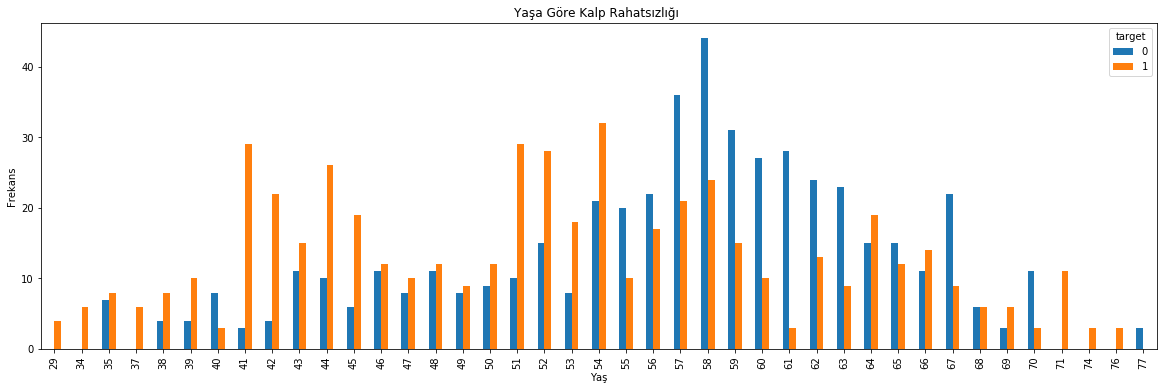

In [2]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Yaşa Göre Kalp Rahatsızlığı ')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.savefig('KalpRahatsizligiveYas.png')
plt.show()

**1.2. Cinsiyete Göre Kalp Rahatsızlığı Dağılımı**

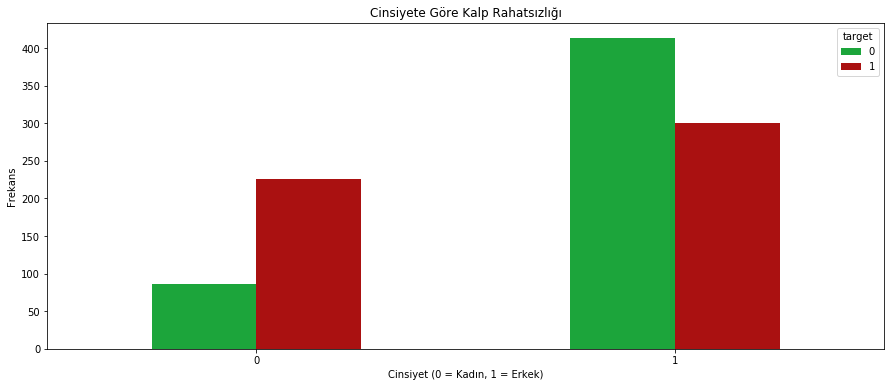

In [3]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Cinsiyete Göre Kalp Rahatsızlığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.ylabel('Frekans')
plt.show()

**1.3. Göğüs Ağrısı Tipine Göre Kalp Rahatsızlığı Dağılımı**

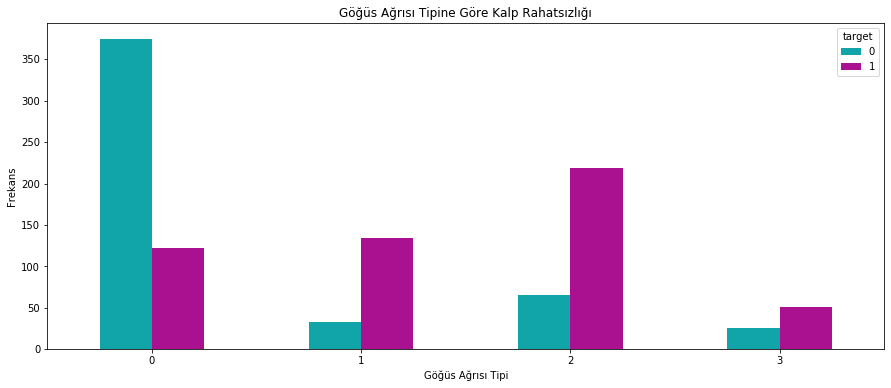

In [4]:
pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Göğüs Ağrısı Tipine Göre Kalp Rahatsızlığı')
plt.xlabel('Göğüs Ağrısı Tipi')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.4. Büyük Damar Sayısına Göre Kalp Rahatsızlığı Dağılımı**

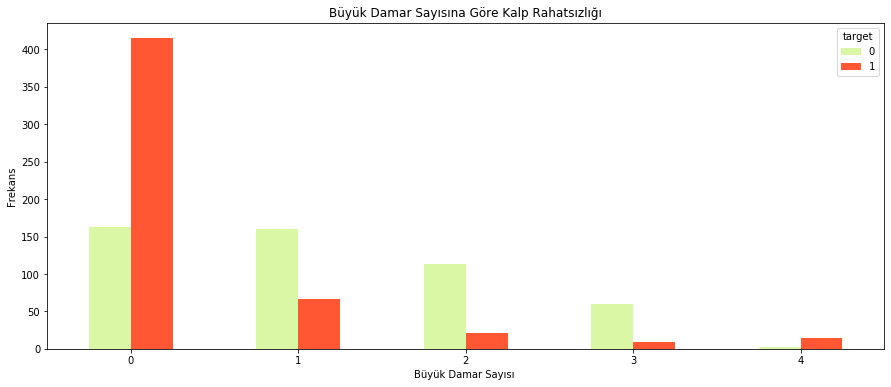

In [5]:
pd.crosstab(dataset.ca,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Büyük Damar Sayısına Göre Kalp Rahatsızlığı')
plt.xlabel('Büyük Damar Sayısı ')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.5. Slope'a Göre Kalp Rahatsızlığı Dağılımı**

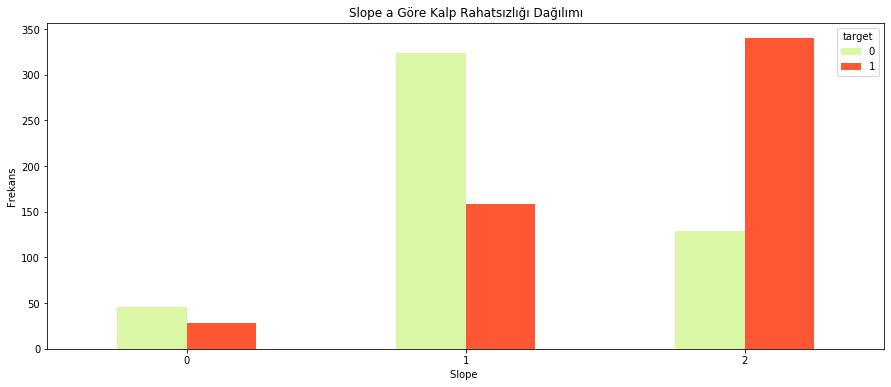

In [6]:
pd.crosstab(dataset.slope,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Slope a Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Slope ')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.6. Trestbps'ye Göre Kalp Rahatsızlığı Dağılımı**

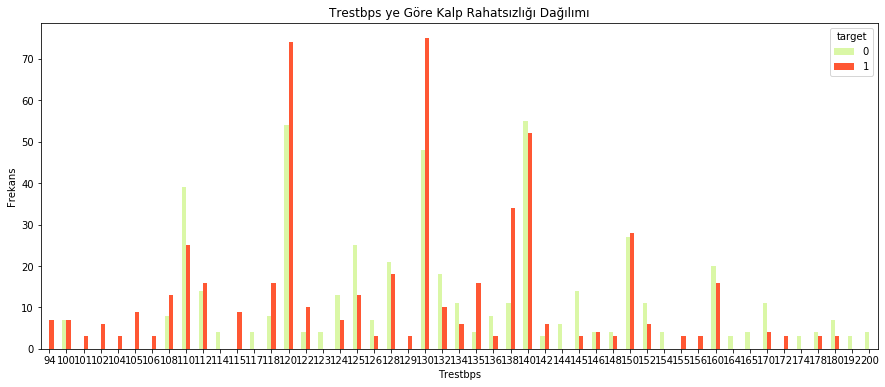

In [7]:
pd.crosstab(dataset.trestbps,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Trestbps ye Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Trestbps')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.7. Fbs'ye Göre Kalp Rahatsızlığı Dağılımı**

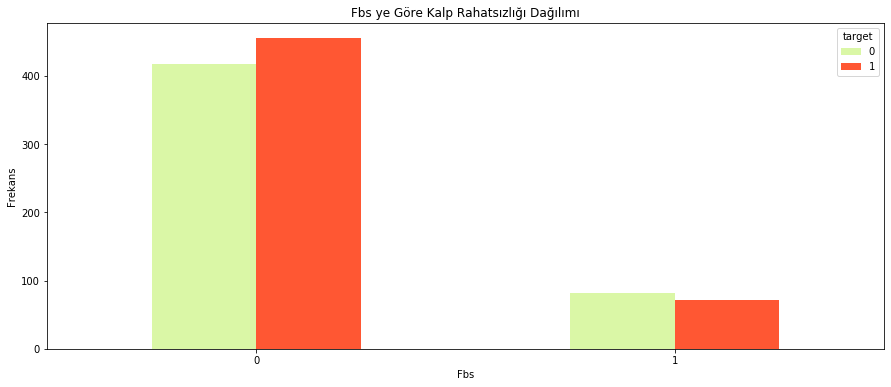

In [8]:
pd.crosstab(dataset.fbs,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Fbs ye Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Fbs')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.8. Restecg'e Göre Kalp Rahatsızlığı Dağılımı**

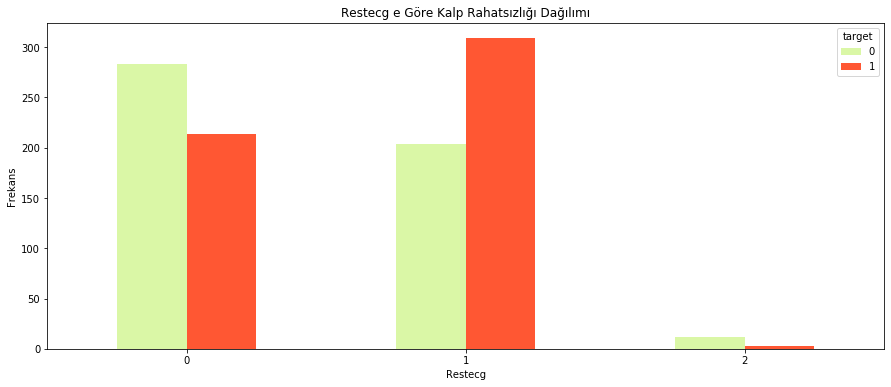

In [9]:
pd.crosstab(dataset.restecg,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Restecg e Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Restecg')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.9. Exang'a Göre Kalp Rahatsızlığı Dağılımı**

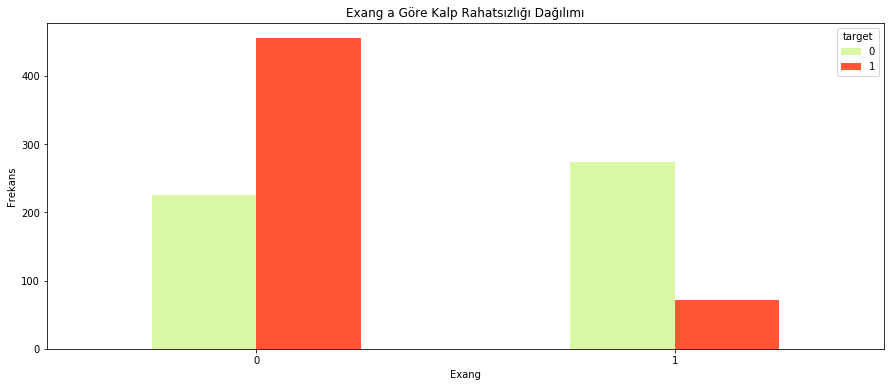

In [10]:
pd.crosstab(dataset.exang,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Exang a Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Exang')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.10. Oldpeak'e Göre Kalp Rahatsızlığı Dağılımı**

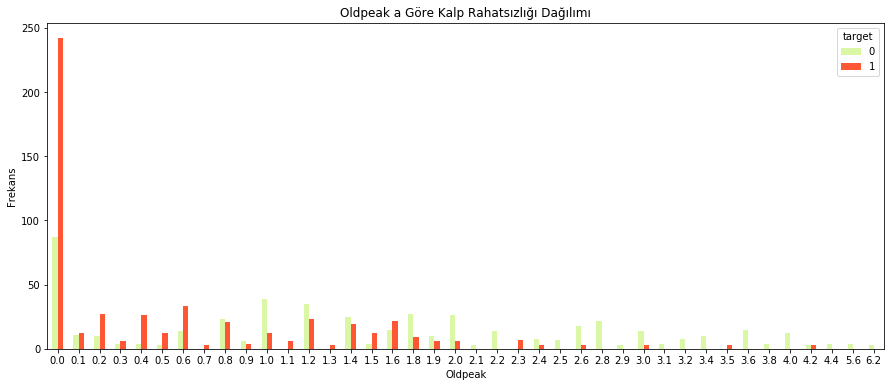

In [11]:
pd.crosstab(dataset.oldpeak,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Oldpeak a Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Oldpeak')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

**1.11. Thal'a Göre Kalp Rahatsızlığı Dağılımı**

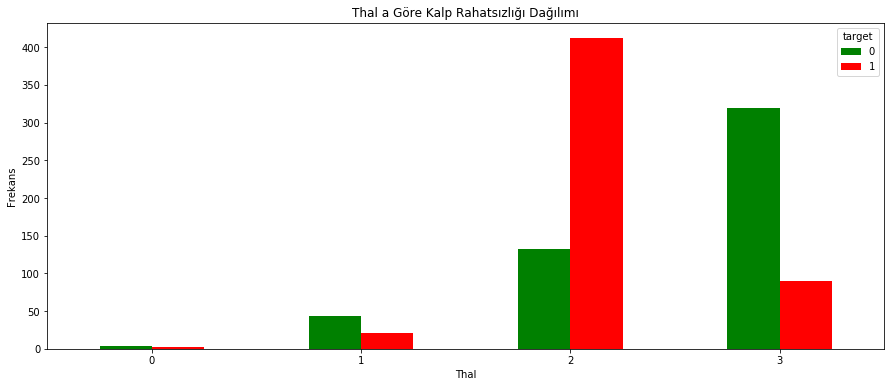

In [12]:
pd.crosstab(dataset.thal,dataset.target).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Thal a Göre Kalp Rahatsızlığı Dağılımı')
plt.xlabel('Thal')
plt.xticks(rotation = 0)
plt.ylabel('Frekans')
plt.show()

### 2. Özniteliklerin Sonuca Etkileri
**2.1. Özniteliklerin Etkilerini Gösteren Grafik**

C:\Users\kaan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


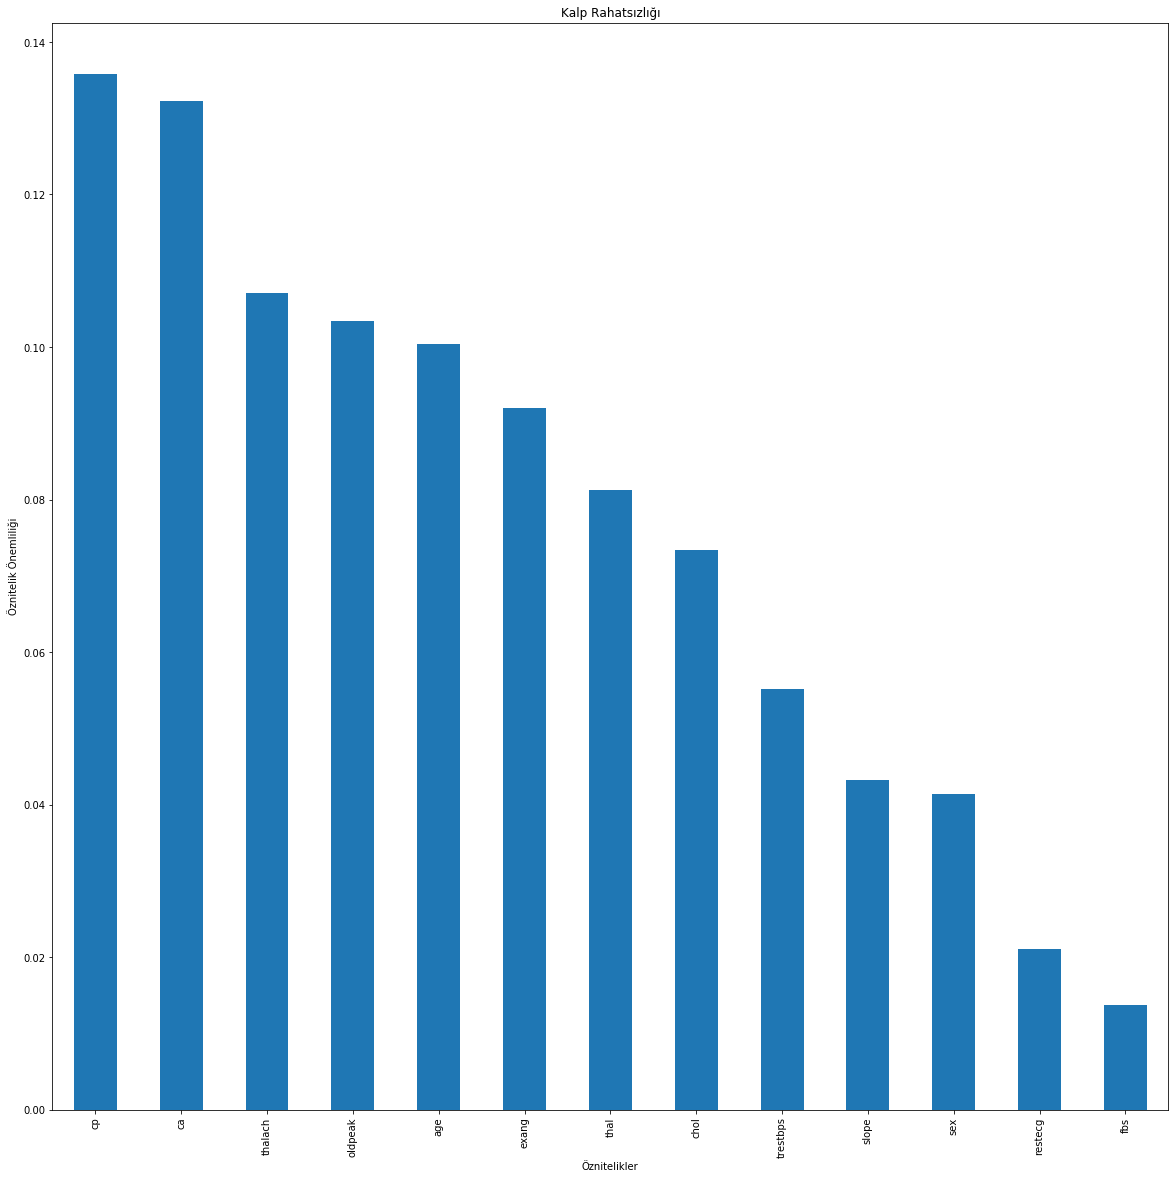

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Kalp Rahatsızlığı',figsize=(20,20))
plt.xlabel('Öznitelikler')
plt.ylabel('Öznitelik Önemliliği')
plt.show()

**2.2. Özniteliklerin Sonuca Etkilerine Göre Listesi**

In [19]:
explanatory = dataset.drop('target', axis=1)
dependent = dataset[['target']]
factors = open('C:/Users/kaan/OneDrive/Masaüstü/heart.txt').read()

predictors=list(explanatory)
Attributes = pd.DataFrame({
    'Öznitelikler': predictors})
feat_impDF = pd.DataFrame(feat_imp, columns=['değer'])
feat_impDF.reset_index(inplace=True)
feat_impDF.columns = ['Öznitelikler', 'değer']
feats = pd.merge(feat_impDF,Attributes, on='Öznitelikler')
most_important =feats[feats['değer']>0]
most_important

,Öznitelikler,değer
0,cp,0.135746
1,ca,0.132287
2,thalach,0.107044
3,oldpeak,0.103439
4,age,0.100359
5,exang,0.092059
6,thal,0.081219
7,chol,0.073348
8,trestbps,0.055135
9,slope,0.043180


### 3. kNN Algoritması Kullanılırken Seçilecek k Değeri

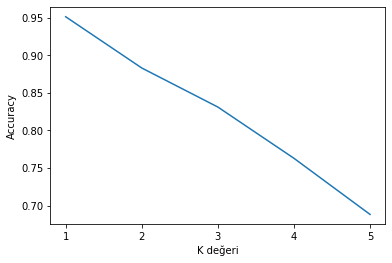

In [20]:
accuracies = {}
kNNAccuracies = {}



#kNN sınıflandırma tanımı ve k=2 için sistemin eğitilmesi
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
scoreList2=[]

#en yüksek doğruluğu veren k değerinin bulmak için 20 komşuya kadar sürekli sistemi eğiten for döngüsü
for i in range(1,6):
    knnClass1 = KNeighborsClassifier(n_neighbors = i) 
    knnClass1.fit(x_train, y_train)
    scoreList.append(knnClass1.score(x_test, y_test))
    scoreList2.append(knnClass1.score(x_train,y_train))
    
#k değerinin değişimine göre sistemin accuracy oranının değişimini gösteren grafik
plt.xticks(np.arange(1,6,1))
plt.xlabel("K değeri")
plt.ylabel("Accuracy")
plt.plot(range(1,6), scoreList)
plt.show()


**3.1. k=1 Değeri İçin**

Maksimum sonucu veren k değeri:  1
kNN train accuracy oranı: %100.00
kNN  test accuracy oranı: %98.70


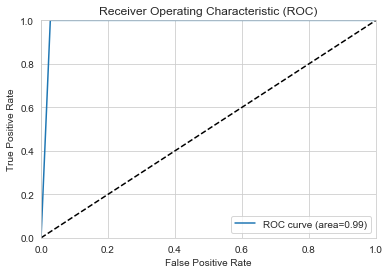

Confusion matrix
[[141   4]
 [  0 163]]


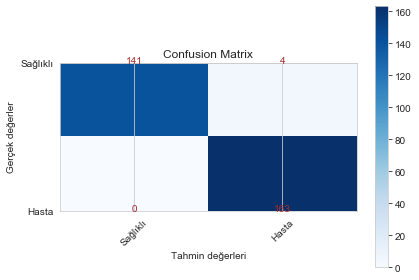

              precision    recall  f1-score   support

    Sağlıklı       1.00      0.97      0.99       145
       Hasta       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [40]:
#En yüksek accuracy oranını veren k değerini bulma
acc = max(scoreList)*100
a=scoreList.index(max(scoreList))
print("Maksimum sonucu veren k değeri: ",a+1)

#k olarak en yüksek accuracy'i veren değerle sistemin eğitimi
kNNClass4 = KNeighborsClassifier(n_neighbors = 1)
kNNClass4.fit(x_train, y_train)

#En verimli k için test ve train accuracy oranı
acc2=kNNClass4.score(x_train,y_train)*100
acc3 = kNNClass4.score(x_test,y_test)*100
print("kNN train accuracy oranı: %{:.2f}".format(acc2))
print("kNN  test accuracy oranı: %{:.2f}".format(acc3))
kNNAccuracies['k=1'] = acc3

#Sistemin test verisi üzerinden tahminde bulunarak sınıflandırma yapması
y_predict = kNNClass4.predict(x_test)
plot_roc(y_predict,y_test)
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_predict)
cm_plot_labels = ['Sağlıklı','Hasta']
plot_confusion_matrix(cm_knn,cm_plot_labels,title='Confusion Matrix')
plt.show()

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**3.2. k=2 Değeri İçin**

Maksimum sonucu veren k değeri:  1
kNN train accuracy oranı: %99.30
kNN  test accuracy oranı: %93.83


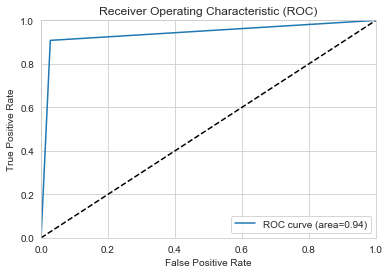

Confusion matrix
[[141   4]
 [ 15 148]]


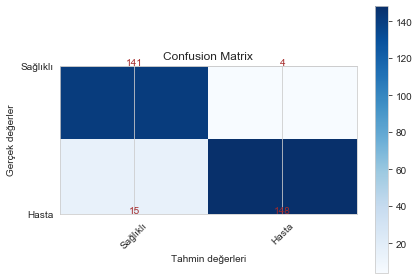

              precision    recall  f1-score   support

    Sağlıklı       0.90      0.97      0.94       145
       Hasta       0.97      0.91      0.94       163

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [41]:
#En yüksek accuracy oranını veren k değerini bulma
acc = max(scoreList)*100
a=scoreList.index(max(scoreList))
print("Maksimum sonucu veren k değeri: ",a+1)

#k olarak en yüksek accuracy'i veren değerle sistemin eğitimi
kNNClass4 = KNeighborsClassifier(n_neighbors = 2)
kNNClass4.fit(x_train, y_train)

#En verimli k için test ve train accuracy oranı
acc2=kNNClass4.score(x_train,y_train)*100
acc4 = kNNClass4.score(x_test,y_test)*100
print("kNN train accuracy oranı: %{:.2f}".format(acc2))
print("kNN  test accuracy oranı: %{:.2f}".format(acc4))
kNNAccuracies['k=2'] = acc4

#Sistemin test verisi üzerinden tahminde bulunarak sınıflandırma yapması
y_predict = kNNClass4.predict(x_test)
plot_roc(y_predict,y_test)
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_predict)
cm_plot_labels = ['Sağlıklı','Hasta']
plot_confusion_matrix(cm_knn,cm_plot_labels,title='Confusion Matrix')
plt.show()

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**3.3. k=3 Değeri İçin**

Maksimum sonucu veren k değeri:  1
kNN train accuracy oranı: %97.91
kNN  test accuracy oranı: %86.69


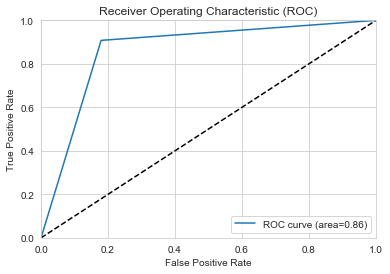

Confusion matrix
[[119  26]
 [ 15 148]]


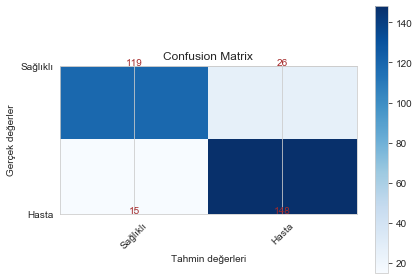

              precision    recall  f1-score   support

    Sağlıklı       0.89      0.82      0.85       145
       Hasta       0.85      0.91      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.86      0.87       308
weighted avg       0.87      0.87      0.87       308



In [42]:
#En yüksek accuracy oranını veren k değerini bulma
acc = max(scoreList)*100
a=scoreList.index(max(scoreList))
print("Maksimum sonucu veren k değeri: ",a+1)

#k olarak en yüksek accuracy'i veren değerle sistemin eğitimi
kNNClass4 = KNeighborsClassifier(n_neighbors = 3)
kNNClass4.fit(x_train, y_train)

#En verimli k için test ve train accuracy oranı
acc2=kNNClass4.score(x_train,y_train)*100
acc5 = kNNClass4.score(x_test,y_test)*100
print("kNN train accuracy oranı: %{:.2f}".format(acc2))
print("kNN  test accuracy oranı: %{:.2f}".format(acc5))
kNNAccuracies['k=3'] = acc5

#Sistemin test verisi üzerinden tahminde bulunarak sınıflandırma yapması
y_predict = kNNClass4.predict(x_test)
plot_roc(y_predict,y_test)
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_predict)
cm_plot_labels = ['Sağlıklı','Hasta']
plot_confusion_matrix(cm_knn,cm_plot_labels,title='Confusion Matrix')
plt.show()

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**3.4. k Değerlerinin Karşılaştırılması**

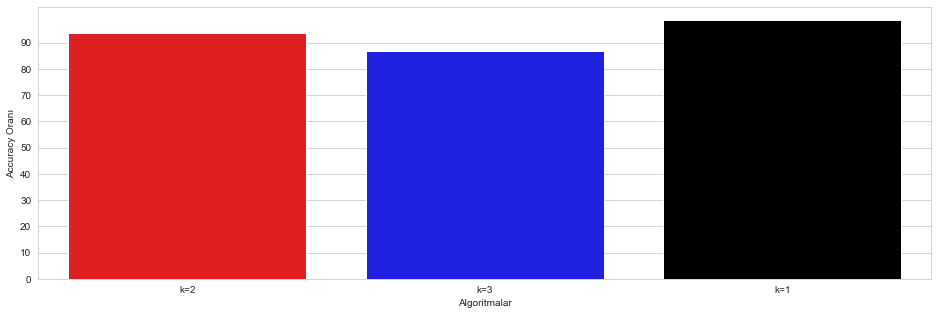

In [43]:
import seaborn as sns

colors = ["red", "blue", "black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy Oranı")
plt.xlabel("Algoritmalar")
sns.barplot(x=list(kNNAccuracies.keys()), y=list(kNNAccuracies.values()), palette=colors)
plt.show()



#### 4. Kullanılan Algoritmaların Karşılaştırılması

**4.1. kNN Algoritması**

kNN train accuracy oranı: %99.30
kNN  test accuracy oranı: %93.83


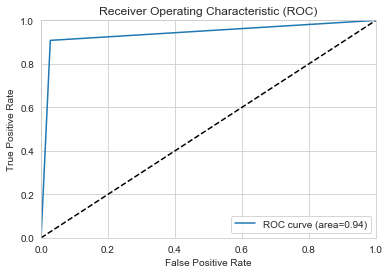

Confusion matrix
[[141   4]
 [ 15 148]]


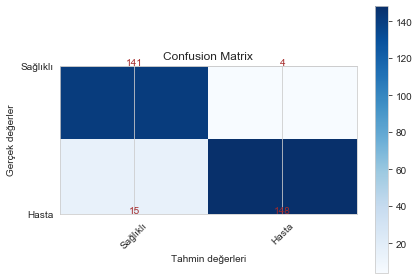

              precision    recall  f1-score   support

    Sağlıklı       0.90      0.97      0.94       145
       Hasta       0.97      0.91      0.94       163

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [44]:
#k olarak en yüksek accuracy'i veren değerle sistemin eğitimi
kNNClass2 = KNeighborsClassifier(n_neighbors = 2)
kNNClass2.fit(x_train, y_train)

#En verimli k için test ve train accuracy oranı
acc2=kNNClass2.score(x_train,y_train)*100
acc3 = kNNClass2.score(x_test,y_test)*100
print("kNN train accuracy oranı: %{:.2f}".format(acc2))
print("kNN  test accuracy oranı: %{:.2f}".format(acc3))
accuracies['kNN'] = acc3

#Sistemin test verisi üzerinden tahminde bulunarak sınıflandırma yapması
y_predict = kNNClass2.predict(x_test)
plot_roc(y_predict,y_test)
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_predict)
cm_plot_labels = ['Sağlıklı','Hasta']
plot_confusion_matrix(cm_knn,cm_plot_labels,title='Confusion Matrix')
plt.show()

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**4.2. Naive Bayes Sınıflandırıcısı**

Naive Bayes train accuracy oranı: %84.52
Naive Bayes test accuracy oranı: %84.42
Confusion matrix
[[109  36]
 [ 12 151]]


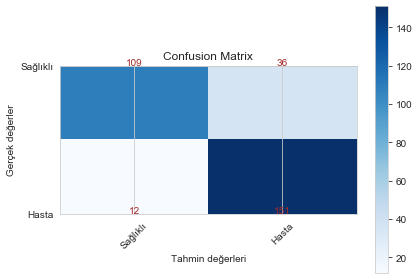

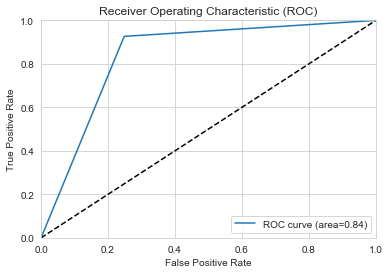

              precision    recall  f1-score   support

    Sağlıklı       0.90      0.75      0.82       145
       Hasta       0.81      0.93      0.86       163

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308



In [45]:
#Naive Bayes sınıflandırması için sistemin oluşturulması
from sklearn.naive_bayes import GaussianNB
NBClass = GaussianNB()

#Naive Bayes sisteminde train verisinin eğitime sokulması
NBClass.fit(x_train, y_train)

#Naive bayes algoritmasına göre train ve test datalarının accuracy oranlarının hesaplanması
acc2=NBClass.score(x_train,y_train)*100
acc = NBClass.score(x_test,y_test)*100
print("Naive Bayes train accuracy oranı: %{:.2f}".format(acc2))
print("Naive Bayes test accuracy oranı: %{:.2f}".format(acc))
accuracies['Naive Bayes'] = acc


#Sistemin test verisi üzerinden tahminde bulunarak sınıflandırma yapması
y_predict = NBClass.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')
plot_roc(y_predict, y_test)

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))


**4.3. Support Vector Machine Algoritması**

SVM train accuracy oranı: %85.08
SVM test accuracy oranı: %85.06
Confusion matrix
[[109  36]
 [ 10 153]]


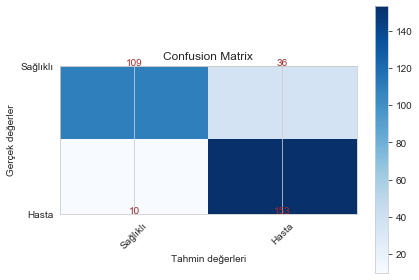

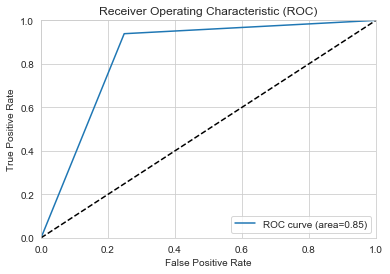

              precision    recall  f1-score   support

    Sağlıklı       0.92      0.75      0.83       145
       Hasta       0.81      0.94      0.87       163

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



In [47]:
from sklearn import svm

#Create a svm Classifier
#Support vector machine sınıflandırıcı oluşturma:: linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed'
SVMClass = svm.SVC(kernel='linear')

#clf = svm.LinearSVC(max_iter=1000,loss='squared_hinge') # Linear Kernel
#Train datayı kullanarak sistemi eğitime sokma
SVMClass.fit(x_train, y_train)

#Support vector machine algoritmasına göre train ve test datalarının accuracy oranlarının hesaplanması
acc2=SVMClass.score(x_train,y_train)*100
acc = SVMClass.score(x_test,y_test)*100
print("SVM train accuracy oranı: %{:.2f}".format(acc2))
print("SVM test accuracy oranı: %{:.2f}".format(acc))
accuracies['SVM'] = acc
y_predict = SVMClass.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')
plot_roc(y_predict, y_test)

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**4.4. Random Forest Algoritması**

Random Forest Algorithm train Accuracy Score : 99.86%
Random Forest Algorithm test Accuracy Score : 98.38%
Confusion matrix
[[145   0]
 [  5 158]]


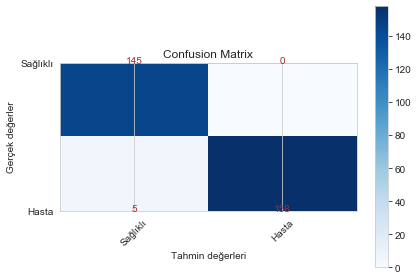

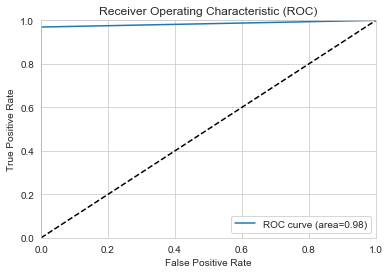

              precision    recall  f1-score   support

    Sağlıklı       0.97      1.00      0.98       145
       Hasta       1.00      0.97      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [48]:
from sklearn.ensemble import RandomForestClassifier
RFClass = RandomForestClassifier(n_estimators = 3, random_state = 1)
RFClass.fit(x_train, y_train)


acc = RFClass.score(x_test,y_test)*100
acc2 = RFClass.score(x_train,y_train)*100
print("Random Forest Algorithm train Accuracy Score : {:.2f}%".format(acc2))
print("Random Forest Algorithm test Accuracy Score : {:.2f}%".format(acc))
accuracies['Random Forest'] = acc


y_predict = RFClass.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')
plot_roc(y_predict, y_test)

#test verileriyle beklenen çıkışların karşılaştırılldığı confusion matrixten gelen verilerle oluşturulan sınıflandırma raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Sağlıklı', 'Hasta']))

**4.5. Algoritmaların Accuracy Oranlarının Karşılaştırılması**

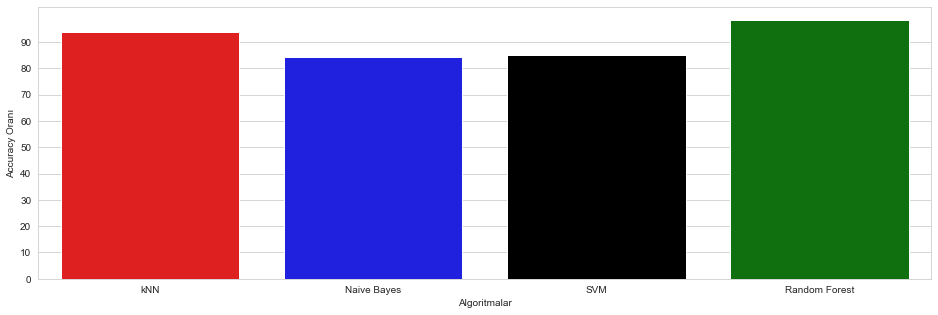

In [49]:
import seaborn as sns

colors = ["red", "blue", "black", "green"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy Oranı")
plt.xlabel("Algoritmalar")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()